<center><font face="Times New ROman" size="10" color="#000080">- NA01 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [1]:
#--------------------------Importando os Pacotes-------------------------------#

%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

In [2]:
#--------------------------Armazenando os Dados-------------------------------#

data = np.fromfile('NA01.dat', dtype=float, count=-1, sep='	')

# Dados importados do .dat (importa os dados em um vetor)

p   = len(data)/6

# como os dados foram importados em um vetor, e preciso dividir pelo número original de colunas (7)...
# ...pois da divisao do vetor pelo numero de colunas nos da quantos elementos estao presentes em cada...
#... uma dessas 7 colunas que representam as propriedades petrofisicas do poco em questao.

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))


7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna


In [3]:
#--------------------------As propriedades petrofisicas do poco-------------------------------#



#---------------------------------------------------------------------------------------------#
# anteriormente transformamos a matriz original importada, um vetor (4606 x 1) em uma matriz de dados (658 x 7)...
#... e agora cada uma dessas 7 colunas representa uma propriedade:

prof = data[:,0] # profundidade em metros
DTP  = data[:,1]
GR   = data[:,2] # GR em unidades API
ILD  = data[:,3] # ILD em Ohm.m
PHIN = data[:,4] # PHIN em %
RHOb = data[:,5] # RHOb em g/cm3

print prof[0]
print prof[p-1]

2950.0556
3150.0044


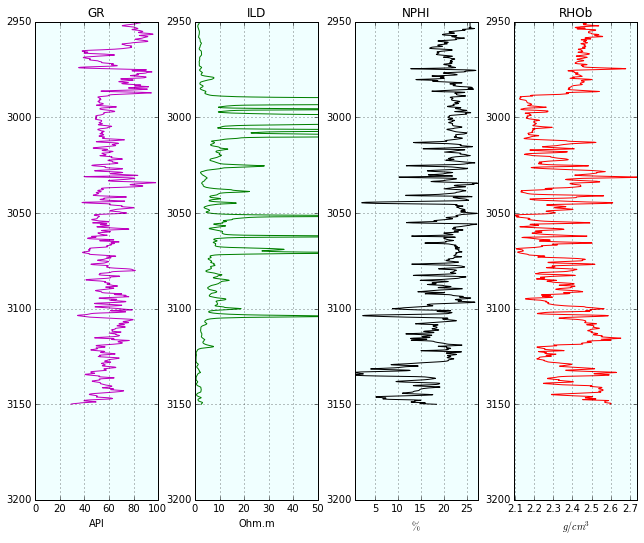

In [4]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=100,xmin=0)
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=50,xmin=0)
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

In [5]:
#--------------------------Determinando os Componentes-------------------------------#

# Ponto mínimo para o Gama Ray, e maximo para gama ray
# pma e dtma em funcao do Gamma Ray

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

1312 posicao do GR min | 28.9712 valor do GR min
552 posicao do GR min | 98.00375 valor do GR max


In [6]:
#--------------------------Determinando os Componentes-------------------------------#

pf  = 1.101 # g/cm3 para a agua salgada
dtf = 189.0 # us/feet para agua salgada

pma  = 2.65 # g/cm3 para o quartzo
dtma = 55.5 # us/feet para o quartzo

print pma, 'pma da matriz  |',pf,'pfl do filtrado de lama'
print dtma,'dtma da matriz |',dtf,'dtfl do filtrado de lama'

2.65 pma da matriz  | 1.101 pfl do filtrado de lama
55.5 dtma da matriz | 189.0 dtfl do filtrado de lama


In [7]:
# ----------------------------- Calculos 1 -----------------------------------

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

phi_t_D   = [] # Porosidade Total (perfil Densidade)
phi_dif_a = [] # Diferença (porosidade total(D) - Porosidade Neutrônica)

for i in range (p):
    
    # ----------------------------- Calculo da Argilosidade -----------------------------------
    
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
    # ----------------------------- Calculo da Porosidade total -----------------------------------
    
    phi_t_D0 = (RHOb[i] - pma)/(pf - pma)        # Porosidade total - perfil densidade 
    phi_t_D.append(phi_t_D0)
    
    # ----------------------------- Calculo da Porosidade total -----------------------------------
    
    phi_dif_a0 = PHIN[i] - (phi_t_D0*100)
    phi_dif_a.append(phi_dif_a0)

for i in range (len(phi_dif_a)):
    if phi_dif_a[i] == max(phi_dif_a): 
        locmax2 = i                               # determina a posicao do valor maximo para (PHI_N - PHI_T,D)
        
psh   = RHOb[locmax2]   # Densidade do Folhelho
dtsh  = DTP[locmax2]   # Vagarosidade do Folhelho 
    
print locmax2,'posicao do max(PHI_n - PHI_T_D) |',max(phi_dif_a),'valor max da diferença'
print psh, 'psh do folhelho  |', dtsh,'dtsh do folhelho'

14 posicao do max(PHI_n - PHI_T_D) | 18.4432173273 valor max da diferença
2.53737 psh do folhelho  | 96.21432 dtsh do folhelho


In [8]:
# ----------------------------- Calculos das Porosidades -----------------------------------

#phi_s   = []   # Porosidade, perfil sonico
phi_d   = []   # Porosidade, perfil densidade
DPPHIN = []   # Diferença de porosidade

#phi_s2  = []   # Porosidade, perfil sonico em %
phi_d2  = []   # Porosidade, perfil densidade em %

for i in range (p):
    phi_d1 = (((RHOb[i] - pma)/(pf - pma)) - ((VSH[i])*(psh - pma)/(pf - pma)))
    phi_d.append(phi_d1)     # Calculo da porosidade pelo perfil densidade, considerando a argilosidade (Dresser Atlas, 1979)
    
    #phi_s1 = ((((DTP[i] - dtma)/(dtf - dtma))) - ((VSH[i])*(dtsh - dtma)/(dtf - dtma)))
    #phi_s.append(phi_s1)     # Calculo da porosidade pelo perfil sonico, considerando a argilosidade (Siqueira & Martins, 2011)
    
    #DPPHIN1 = np.sqrt((phi_s1 - phi_d1)**2)*100
    #DPPHIN.append(DPPHIN1) # porosidade densidade - porosidade sonico
    
    #----------------------Perfis de Porosidade

    #phi_s0 = phi_s1*100      # Calculo porosidade, perfil sonico em %
    #phi_s2.append(phi_s0)
    
    phi_d0 = phi_d1*100
    phi_d2.append(phi_d0)    # Calculo porosidade, perfil densidade em %

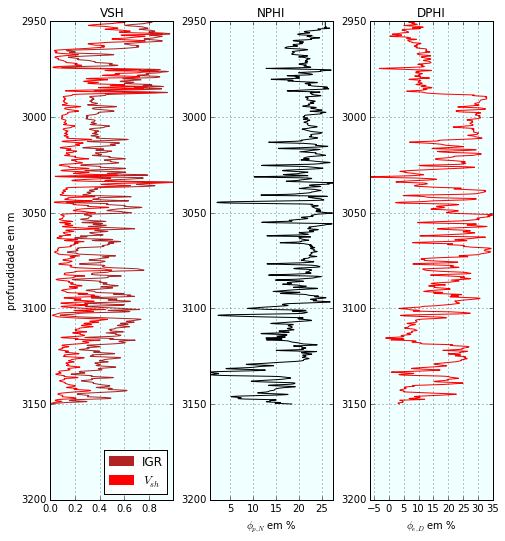

In [9]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(IGR,prof,'-',linewidth = 1,color='#B22222')
ax8.plot(VSH,prof,'-',linewidth = 1,color='red')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VSH')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VSH),xmin=min(VSH))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')
ax9.plot(PHIN,prof,'-k',linewidth = 1)
ax9.set_title('NPHI')
ax9.set_xlabel('$\phi _{p,N}$ em %')


plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#----------------------------------------------------------

ax11 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax11.plot(phi_d2,prof,'-r',linewidth = 1)
ax11.set_title('DPHI')
ax11.set_xlabel('$\phi _{e,D}$ em %')


plt.gca().invert_yaxis()

plt.xlim(xmax=max(phi_d2),xmin=min(phi_d2))
plt.grid()




plt.show()

In [10]:
dtps = [] # Sonico Estimado - Martins e Siqueira
dtpa = data[:,1]

phis = max(phi_dif_a)/100 # porosidade total aparente do folhelho

dtdif1 = []

for i in range (p):
    
    dtps1 = dtma + (dtf - dtma)*(phi_d[i] + (VSH[i]*phis)) # Sonico Estimado (Siqueira & Martins)
    dtps.append(dtps1)

    
    #--------------------------------------------------------------------------------------------------------
    
    dtdif01 = np.sqrt((dtpa[i] - dtps1)**2)
    dtdif1.append(dtdif01)

In [11]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
z_imp=[]

cfvp = 3.281*(10**(-6)) # conversao 

t0 = 2497.50 #tempo inicial em ms #

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*dtps[i]))


z_imp = [] # Impedancia acustica
for i in range (p):
    z_imp0 = (RHOb[i]*VP[i])
    z_imp.append(z_imp0)
    
DL = prof[3]-prof[2]# valor do intervalo em m

VRMS    = [0]*p
VRMS[0] = VP[0]

# velocidade VRMS

sssp = np.array([0.00]*p)
sssq = np.array([0.00]*p)
sssh = np.array([0.00]*p)

for i in range (p):
    sssp[i] = (DL)*(VP[i])
    sssq[i] = (DL)/(VP[i])
    sssh[i] = (DL)

for i in range (1,p):
    sssp[i] = sssp[i-1] + (DL)*(VP[i])
    sssq[i] = sssq[i-1] + (DL)/(VP[i])
    sssh[i] = sssh[i-1] + (DL)
    
for i in range (p):
    VRMS[i] = np.sqrt(sssp[i]/sssq[i])
VRMS[0] = VP[0]
#------------------------------------------#
VMED    = [0]*p

for i in range (p):
    VMED[i] = sssh[i]/sssq[i]

VMED[0] = VP[0]
np.sqrt(sssp/sssq)

    
#-----------------------------------------------------

R=[]
for i in range (p):
    if i == 0:
        RR = 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
    R.append(RR)
    
zero_bar = [0]*p

#---------------------------------------------time c(t)-----------------------------#
T = [] #tempo por intervalo
TD = []

for i in range (p):
    T.append(DL/VP[i])
    TD.append(DL/VP[i])
    
print np.mean(T),' = media de T em s'
print prof[p-1] - prof[0],'m = intervalo amostrado'

TT  = [] # linha de tempo
TTA = [] # linha de tempo acumulativa
for i in range (p):
    TT.append(np.mean(T) - 0.0759120306e-05) # ajuste do tempo
    TTA.append(np.mean(T) - 0.0759120306e-05)
    
    
profT0 = [] # nova profundidade - intervalar
profT = [] # nova profundidade - acumulativa 

for i in range (p):
    profT0.append(TT[i]*VP[i])
    profT.append(TT[i]*VP[i])
    
print sum(profT0),'m = novo intervalo amostrado '

#-----------------------------parte acumulativa-------------------------------#

for i in range (1,p):
    TTA[i] = TTA[i-1]+TTA[i]
    profT[i] = profT[i-1]+profT[i]
    TD[i] = TD[i-1]+TD[i]
    
print mean(TT)
#print profT

for i in range(len(profT)):
    profT[i] = profT[i]+2950.0000
    
#print profT

4.21202712306e-05  = media de T em s
199.9488 m = intervalo amostrado
199.9488178 m = novo intervalo amostrado 
4.13611509246e-05


In [12]:
TW = []
for i in range (-p/2,p/2):
    TW.append(i*mean(TT))
    
print len(TW)

1313


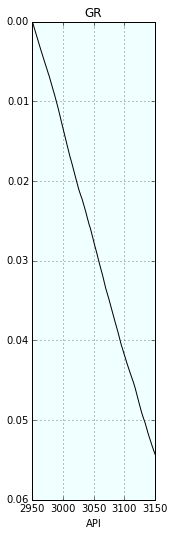

In [13]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)    

#________________________________________________

ax7 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax7.plot(profT,TTA,'-k',linewidth = 1) #VP
ax7.set_title('GR')
ax7.set_xlabel('API')

plt.gca().invert_yaxis()

#plt.xlim(xmax=4500,xmin=2700)
plt.grid()
plt.show()

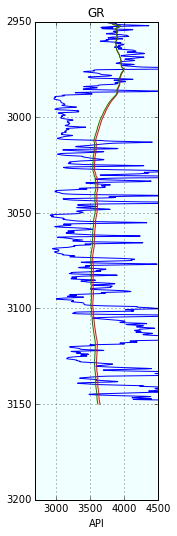

In [14]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)    

#________________________________________________

ax7 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax7.plot(VP,prof,'-b',linewidth = 1) #VP
ax7.plot(VRMS,prof,'-r',linewidth = 1) #VRMS
ax7.plot(VMED,prof,'-g',linewidth = 1) #VMED
ax7.set_title('GR')
ax7.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=4500,xmin=2700)
plt.grid()
plt.show()


In [15]:
#---------------------------Tempo em milisegundo----------------------------
t = [0]*p
t[0] = t0

for i in range (1,p):
    t[i] = t[i-1] + (((2.00)*DL)/(VMED[i]))*1.0
    
T = [0]*p

for i in range (p):
    T[i] = DL/VP[i]

Ta = [0]*p
Ta[0] = T[0]

for i in range (1,p):
    Ta[i] = (Ta[i-1]+T[i])
    
print Ta[p-1],Ta[0]
    
for i in range (1,p):
    Ta[i] = 2.0*Ta[i]
    
for i in range (p):    
    Ta[i] = t0+(Ta[i])


0.0553039161258 4.01745946834e-05


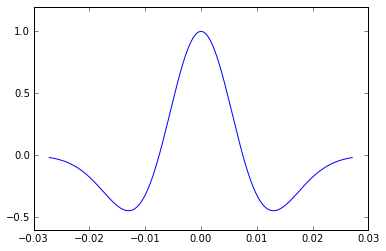

In [16]:
#---------------------------Tempo t teste----------------------------

    
A = 1         # Amplitude
F = 30*np.pi  # Frequencia

psi_f2 = []


for i in range (p):
    
    EE1 = -(F**2)*((TW[i])**2)

    psi_01 = A*(1 - (2 )* (F**2) * ((TW[i])**2))*np.exp(EE1)
        
    psi_f2.append(psi_01)
    
plt.plot(TW,psi_f2)
plt.show()

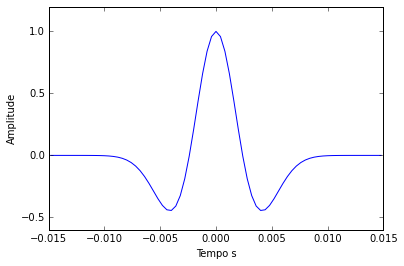

In [26]:
dt = 4.00 # ms
nw = 75
freq = 30 # Hz

tt = []
wav = []
for i in range(nw):
    t = (i-37.00)*(dt)*(0.0001)
    tt.append(t)
    a = freq*np.pi
    EE1 = -(np.pi**2)*(a**2)*((t)**2) #parte exponencial
    psi_01 = (1 - (2*(np.pi**2)) * (a**2) * ((t)**2))*np.exp(EE1) # restante da operacao
    wav.append(psi_01)

plt.plot(tt,wav)
plt.xlabel('Tempo s')
plt.ylabel('Amplitude')
plt.show()

1313


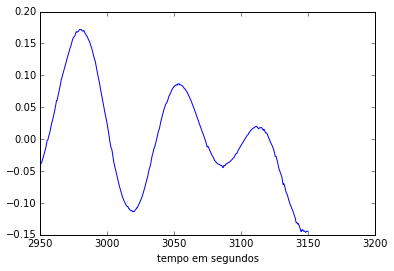

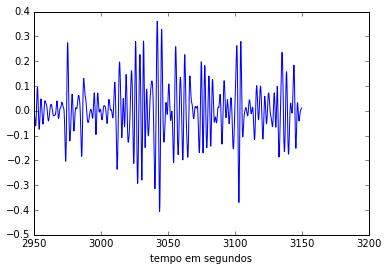

In [23]:
signal02 = np.convolve(R,psi_f2,'same')
signal03 = np.convolve(R,wav,'same')

print len(signal02)


plt.plot(prof,signal02)
plt.xlabel("tempo em segundos")
plt.show()

plt.plot(prof,signal03)
plt.xlabel("tempo em segundos")
plt.show()


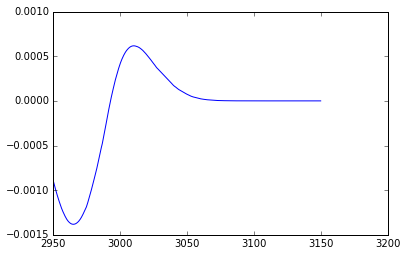

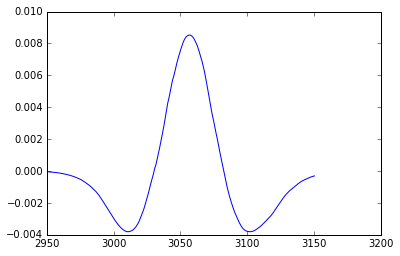

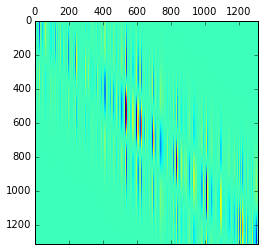

In [24]:
#----------------------------simple signal------------------------------
# tempo acumulativo = TD

MSS = np.array([[0.0]*len(TD)]*len(TD))
    
for j in range(p):
    for i in range(p):
        EE = -(F**2)*((TD[i]-TD[j])**2)
        MSS[j,i] = R[i]*(A*(1 - (2 )* (F**2) * ((TD[i]-TD[j])**2))*np.exp(EE))
        
MV = MSS.sum(axis=0)
MH = MSS.sum(axis=1)

plt.plot(prof,MSS[:,100])
plt.show()

plt.plot(prof,MSS[:,700])
plt.show()

matshow(MSS)
show()

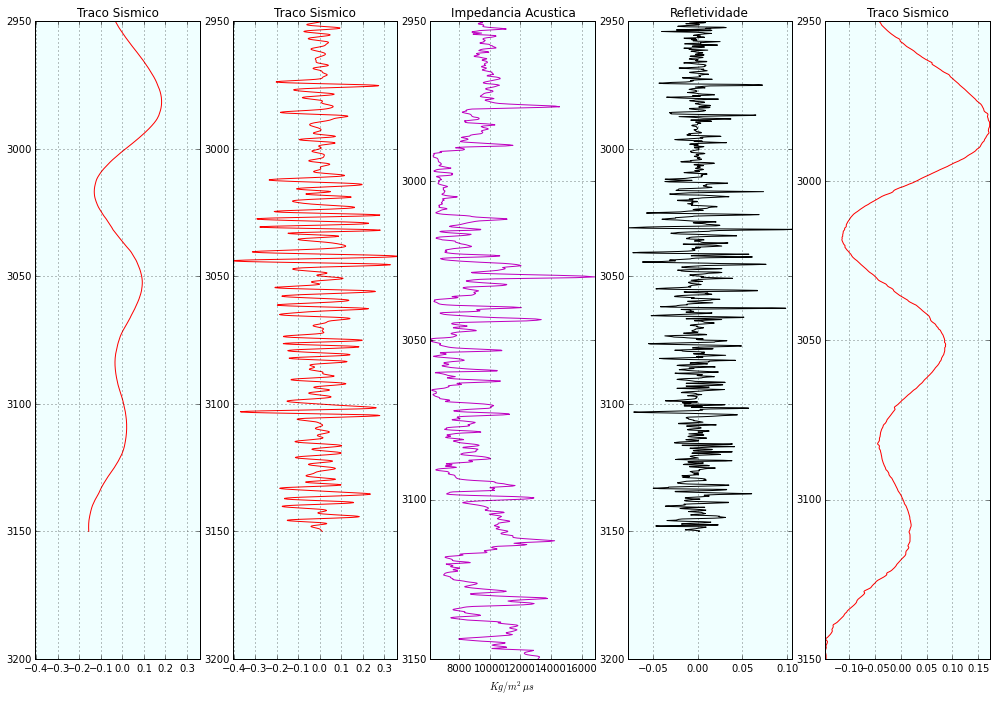

In [25]:
#---------------------Graficos 3-------------------------------

fig = plt.figure(figsize= (20,80))
fig.subplots_adjust(left=0.1, wspace=0.2)

ax22 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax22.plot(MH,prof,'-r',linewidth = 1)

ax22.set_title('Traco Sismico')
ax22.set_xlabel(' ')

plt.xlim(xmax=max(signal03),xmin=min(signal03))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax22 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax22.plot(signal03,prof,'-r',linewidth = 1)

ax22.set_title('Traco Sismico')
ax22.set_xlabel(' ')

plt.xlim(xmax=max(signal03),xmin=min(signal03))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------
ax21 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')

ax21.plot(z_imp,profT,'-m',linewidth = 1)

ax21.set_title('Impedancia Acustica')
ax21.set_xlabel('$Kg/m^2 \mu s$')

plt.xlim(xmax=max(z_imp),xmin=min(z_imp))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax22 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')

ax22.plot(R,prof,'-k',linewidth = 1)

ax22.set_title('Refletividade')
ax22.set_xlabel(' ')

plt.xlim(xmax=max(R),xmin=min(R))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax22 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')

ax22.plot(signal02,profT,'-r',linewidth = 1)

ax22.set_title('Traco Sismico')
ax22.set_xlabel(' ')

plt.xlim(xmax=max(signal02),xmin=min(signal02))
plt.grid()

plt.gca().invert_yaxis()



plt.show()

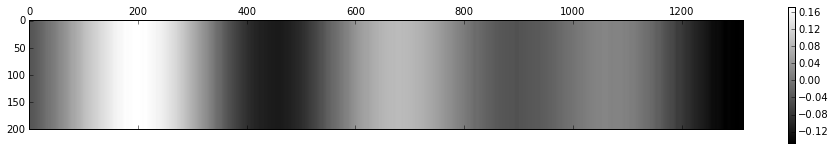

In [21]:
DD = [signal02]*200
matshow(DD,cmap=cm.gray)
colorbar()
show()